**#Assignment1**

##*1) Frailty is physical weakness; lack of health or strength. Reduced grip strength in females correlated with higher frailty scores and vice versa. Hand grip strength can be quantified by measuring the amount of static force that the hand can squeeze around a dynamometer. The force has most commonly been measured in kilograms and pounds. The table below represents data from 10 female participants. The Height is measured in inches, Weight in pounds, Age in years, Grip strength in kilograms. Frailty is qualitative attribute indicated the presence or absence of the symptoms. (10 points).*

##INGEST

In [2]:
import pandas as pd

df = pd.read_csv('/data/frailty_data.csv')

display(df.head())

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


## Unit standardization

### Subtask:
i. Height_m = Height_in * 0.0254

ii. Weight_kg = Weight_lb * 0.45359237



In [3]:
# i. Height_m = Height_in * 0.0254
df['Height_m'] = df['Height'] * 0.0254

# ii. Weight_kg = Weight_lb * 0.45359237
df['Weight_kg'] = df['Weight'] * 0.45359237

display(df.head())

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg
0,65.8,112,30,30,N,1.67132,50.802345
1,71.5,136,19,31,N,1.81610,61.688562
2,69.4,153,45,29,N,1.76276,69.399633
3,68.2,142,22,28,Y,1.73228,64.410117
4,67.8,144,29,24,Y,1.72212,65.317301


## Feature engineering

### Subtask:
i. BMI = Weight_kg / (Height_m ** 2) (round to 2 decimals).

ii. AgeGroup (categorical): "<30", "30–45", "46–60", ">60" based on Age_yr.


In [4]:
# i. BMI = Weight_kg / (Height_m ** 2) (round to 2 decimals).
df['BMI'] = (df['Weight_kg'] / (df['Height_m']**2)).round(2)

# ii. AgeGroup (categorical): "<30", "30–45", "46–60", ">60" based on Age_yr.
bins = [0, 30, 45, 60, float('inf')]
labels = ['<30', '30–45', '46–60', '>60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

display(df.head())

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg,BMI,AgeGroup
0,65.8,112,30,30,N,1.67132,50.802345,18.19,30–45
1,71.5,136,19,31,N,1.81610,61.688562,18.70,<30
2,69.4,153,45,29,N,1.76276,69.399633,22.33,46–60
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,<30
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,<30


## Categorical to numeric encoding

### Subtask:
i. Binary encoding: Frailty_binary (Y→1, N→0, store as int8).

ii. One‑hot encode AgeGroup into columns: AgeGroup_<30, AgeGroup_30–45,
AgeGroup_46–60, AgeGroup_>60
d.

In [5]:
from sklearn.preprocessing import OneHotEncoder

# i. Binary encoding: Frailty_binary (Y→1, N→0, store as int8).
df['Frailty_binary'] = df['Frailty'].map({'N': 0, 'Y': 1})

# ii. One‑hot encode AgeGroup into columns: AgeGroup_<30, AgeGroup_30–45, AgeGroup_46–60, AgeGroup_>60 d.
encoder = OneHotEncoder(sparse_output=False)
encoded_age_group = encoder.fit_transform(df[['AgeGroup']])
encoded_age_group_df = pd.DataFrame(encoded_age_group, columns=encoder.get_feature_names_out(['AgeGroup']))
df = pd.concat([df, encoded_age_group_df], axis=1)

display(df.head())

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg,BMI,AgeGroup,Frailty_binary,AgeGroup_30–45,AgeGroup_46–60,AgeGroup_<30
0,65.8,112,30,30,N,1.67132,50.802345,18.19,30–45,0,1.0,0.0,0.0
1,71.5,136,19,31,N,1.81610,61.688562,18.70,<30,0,0.0,0.0,1.0
2,69.4,153,45,29,N,1.76276,69.399633,22.33,46–60,0,0.0,1.0,0.0
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,<30,1,0.0,0.0,1.0
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,<30,1,0.0,0.0,1.0


## EDA & Reporting

### Subtask:
i. Compute summary table: mean/median/std for numeric columns; save to
reports/findings.md .

ii. Quantify relation of strength ↔ frailty: compute correlation between Grip_kg
and Frailty_binary, and report it.


In [6]:
import os

# i. Compute summary table: mean/median/std for numeric columns; save to reports/findings.md .
numeric_cols = df.select_dtypes(include=['number'])
summary_table = numeric_cols.agg(['mean', 'median', 'std']).T

os.makedirs('reports', exist_ok=True)

with open('reports/findings.md', 'w') as f:
    f.write("## Summary Statistics for Numeric Columns\n\n")
    f.write(summary_table.to_markdown())

# ii. Quantify relation of strength ↔ frailty: compute correlation between Grip_kg and Frailty_binary, and report it.
correlation = df['Grip strength'].corr(df['Frailty_binary'])

with open('reports/findings.md', 'a') as f:
    f.write("\n\n## Correlation between Grip Strength and Frailty (Binary)\n\n")
    f.write(f"The correlation coefficient is: {correlation:.4f}\n")

print("Summary table and correlation reported in reports/findings.md")

Summary table and correlation reported in reports/findings.md


## 2) Perform the 5 data visualization tasks (given below) on the student performance dataset given in the link below. Each figure: 800×600 px, 300 DPI, title, labeled axes/units, legend if applicable, readable ticks. For each, add a 5–8 sentence interpretation to reports. Before the visualizations (analysis step) you need to perform ingestion stage and preprocessing step (missing values etc.) (10 points).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/data/StudentsPerformance.csv")

# Clean column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df = df.rename(columns={
    "math_score":"math", "reading_score":"reading",
    "writing_score":"writing", "test_preparation_course":"test_prep"
})

# Compute overall average
df["overall_avg"] = df[["math","reading","writing"]].mean(axis=1)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_prep,math,reading,writing,overall_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Distribution of Scores
The histograms show that math, reading, and writing scores are roughly normally distributed, with most students scoring between 60 and 80.
This suggests that the class has a fairly balanced performance, with fewer students at the very low or very high ends.

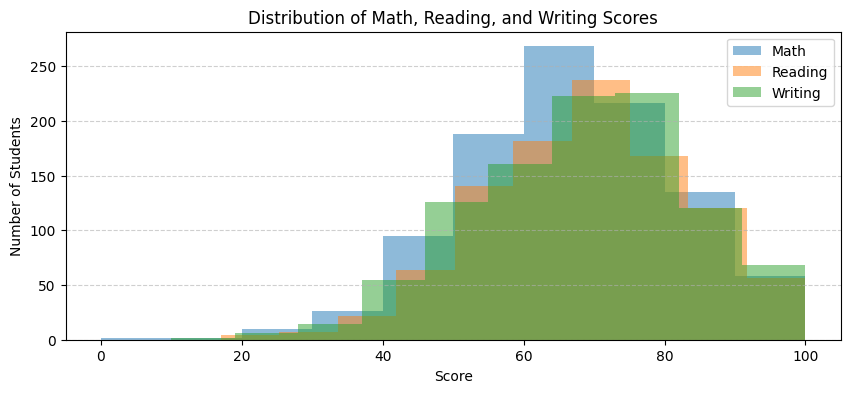

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.hist(df["math"], bins=10, alpha=0.5, label="Math")
plt.hist(df["reading"], bins=10, alpha=0.5, label="Reading")
plt.hist(df["writing"], bins=10, alpha=0.5, label="Writing")

plt.title("Distribution of Math, Reading, and Writing Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Average Scores by Gender
This chart shows that male students tend to have slightly higher math scores, while female students score higher in reading and writing.
Overall, female students generally have a small advantage in language-related subjects.

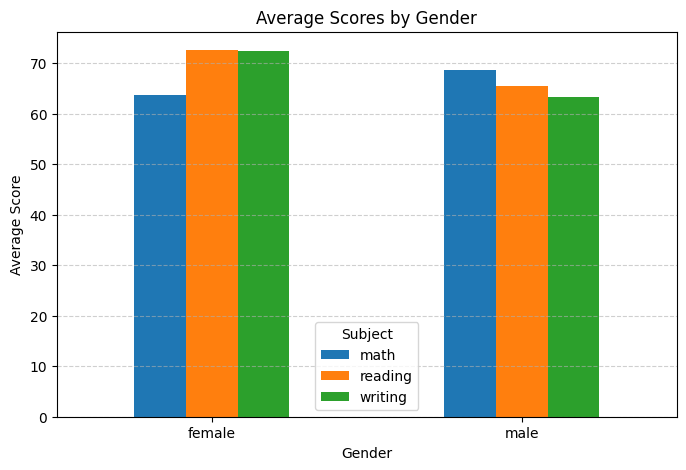

In [3]:
means = df.groupby("gender")[["math","reading","writing"]].mean()

means.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Impact of Parental Education
Students with parents who hold higher education degrees (bachelor's or master's) tend to have higher average scores.
This trend suggests a positive link between parental education and student performance.

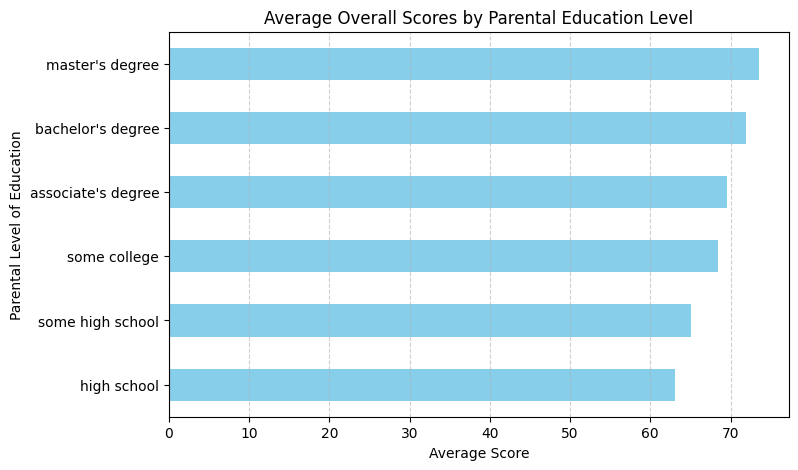

In [4]:
edu_means = df.groupby("parental_level_of_education")["overall_avg"].mean().sort_values()

edu_means.plot(kind="barh", figsize=(8,5), color="#87CEEB")
plt.title("Average Overall Scores by Parental Education Level")
plt.xlabel("Average Score")
plt.ylabel("Parental Level of Education")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

### Effect of Test Preparation Course
Students who completed the test preparation course have higher average scores in math, reading, and writing compared to those who did not.
This indicates that test preparation has a meaningful impact on improving academic outcomes.

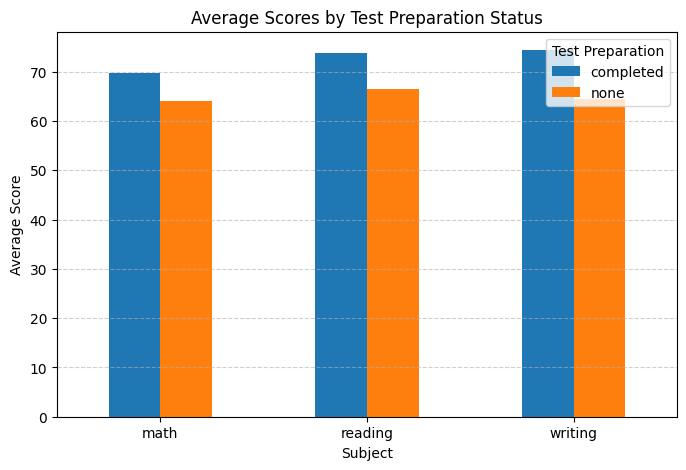

In [5]:
prep_means = df.groupby("test_prep")[["math","reading","writing"]].mean().T

prep_means.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by Test Preparation Status")
plt.ylabel("Average Score")
plt.xlabel("Subject")
plt.xticks(rotation=0)
plt.legend(title="Test Preparation")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Overall Performance by Race/Ethnicity
There are some differences in overall performance across race/ethnicity groups, with Group E showing the highest average score.
This could reflect differences in learning opportunities or background factors between groups.

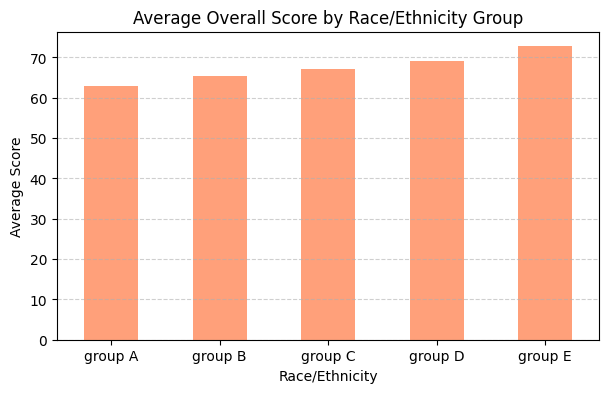

In [6]:
race_means = df.groupby("race/ethnicity")["overall_avg"].mean().sort_values()

race_means.plot(kind="bar", figsize=(7,4), color="#FFA07A")
plt.title("Average Overall Score by Race/Ethnicity Group")
plt.ylabel("Average Score")
plt.xlabel("Race/Ethnicity")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()